## Link to the Analytics Vidhya HACKATHON - JanataHack HealthCare

### https://datahack.analyticsvidhya.com/contest/janatahack-healthcare-analytics/#ProblemStatement

## Steps for Applied Machine Learning (ML) for Hackathons :

1.  Understand the Problem Statement & Import Packages and Datasets.  

2.  Perform EDA (Exploratory Data Analysis) - Understanding the Datasets :

       *       Explore Train and Test Data and get to know what each Column / Feature denotes.
       *       Check for Imbalance of Target Column in Datasets.
       *       Visualize Count Plots & Unique Values to infer from Datasets.
            
3.  Remove Duplicate Rows from Train Data if present.

4.  Fill/Impute Missing Values Continuous - Mean/Median/Any Specific Value & Categorical - Others/ForwardFill/BackFill.

5.  Feature Engineering 

      *       Feature Selection - Selection of Most Important Existing Features.
      *       Feature Creation  - Creation  of New Feature from the Existing Features.
      
6.  Split Train Data into Train and Validation Data with Predictors(Independent) & Target(Dependent).      
7.  Data Encoding - Label Encoding, OneHot Encoding and Data Scaling - MinMaxScaler, StandardScaler, RobustScaler
8.  Create Baseline ML Model
9.  Improve ML Model,Fine Tune with MODEL Evaluation METRIC - ROC_AUC and Predict Traget "Outcome"
10. Result Submission, Check Leaderboard & Improve ROC_AUC

## 1.  Understand the Problem Statement & Import Packages and Datasets :

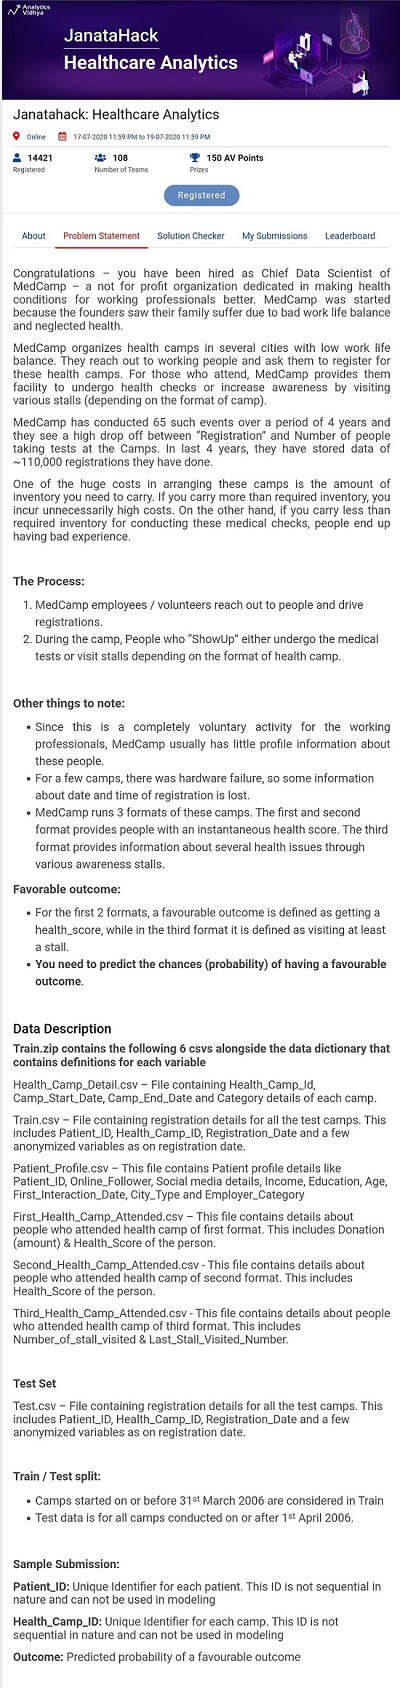

In [ ]:
# Import Required Python Packages :

# Scientific and Data Manipulation Libraries :

import numpy as np
import pandas as pd

# Data Viz & Regular Expression Libraries :

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

# Scikit-Learn ML Libraries :

from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *

# Garbage Collection Libraries :

import gc

# Boosting Algorithm Libraries :

from xgboost                          import XGBClassifier
from catboost                         import CatBoostClassifier
from lightgbm                         import LGBMClassifier
from sklearn.ensemble                 import VotingClassifier

In [ ]:
# Viewing data files present in Default Path "/kaggle/input" :

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Loading data from the default Path "/kaggle/input/" + Created data Repository "health" :
# Import Data from Excel Files in .csv format and store in Table format called DataFrame using Pandas :

train           = pd.read_csv('/kaggle/input/health/AV_Train.csv')
ss              = pd.read_csv('/kaggle/input/health/AV_sample_submmission.csv')
test            = pd.read_csv('/kaggle/input/health/AV_Test.csv')

health_camp     = pd.read_csv('/kaggle/input/health/AV_Health_Camp_Detail.csv')
camp_1          = pd.read_csv('/kaggle/input/health/AV_First_Health_Camp_Attended.csv')
camp_2          = pd.read_csv('/kaggle/input/health/AV_Second_Health_Camp_Attended.csv')
camp_3          = pd.read_csv('/kaggle/input/health/AV_Third_Health_Camp_Attended.csv')

patient_profile = pd.read_csv('/kaggle/input/health/AV_Patient_Profile.csv')

# data_dict       = pd.read_excel('https://www.kaggle.com/vin1234/janatahack-healthcare-analytics/Train/Data_Dictionary.xlsx')

## 2. Perform EDA (Exploratory Data Analysis) - Understanding the Datasets :    

### 2.1 Explore Train and Test Data and get to know what each Column / Feature denotes :

In [ ]:
# Python Method 1 : Displays Data Information :

def display_data_information(data, data_types, dataframe_name):
    print(" Information of ",dataframe_name,": Rows = ",data.shape[0],"| Columns = ",data.shape[1],"\n")
    data.info()
    print("\n")
    for VARIABLE in data_types :
        data_type = data.select_dtypes(include=[ VARIABLE ]).dtypes
        if len(data_type) > 0 :
            print(str(len(data_type))+" "+VARIABLE+" Features\n"+str(data_type)+"\n"  )        

# Display Data Information of "patient_profile" :

data_types  = ["float32","float64","int32","int64","object","category","datetime64[ns]"]
display_data_information(patient_profile, data_types, "patient_profile")

In [ ]:
# Python Method 2 : Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table) :

def display_head_tail(data, head_rows, tail_rows):
    display("Data Head & Tail :")
    display(data.head(head_rows).append(data.tail(tail_rows)))
#     return True

# Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table)
# Pass Dataframe as "patient_profile", No. of Rows in Head = 3 and No. of Rows in Tail = 2 :

display_head_tail(patient_profile, head_rows=3, tail_rows=2)

In [ ]:
# Python Method 3 : Displays Data Description using Statistics :

def display_data_description(data, numeric_data_types, categorical_data_types):
    
    print("Data Description :")
    display(data.describe( include = numeric_data_types))
    print("")
    display(data.describe( include = categorical_data_types))

# Display Data Description of "patient_profile" :

display_data_description(patient_profile, data_types[0:4], data_types[4:7])

In [ ]:
# Display Data Information of "train" :

display_data_information(train, data_types, "train")

In [ ]:
# Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table)
# Pass Dataframe as "train", No. of Rows in Head = 3 and No. of Rows in Tail = 2 :

display_head_tail( train, head_rows=3, tail_rows=2 )

In [ ]:
# Display Data Description of "train" :

display_data_description(train, data_types[0:4], data_types[4:7])

In [ ]:
# Display Data Information of "test" :

display_data_information(test, data_types, "test")

In [ ]:
# Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table)
# Pass Dataframe as "test", No. of Rows in Head = 3 and No. of Rows in Tail = 2 :

display_head_tail( test, head_rows=3, tail_rows=2 )

In [ ]:
# Display Data Description of "test" :

display_data_description(test, data_types[0:4], data_types[4:7])

In [ ]:
# Display Data Information of "health_camp" :

display_data_information(health_camp, data_types, "health_camp")

In [ ]:
# Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table)
# Pass Dataframe as "health_camp", No. of Rows in Head = 3 and No. of Rows in Tail = 2 :

display_head_tail(health_camp, head_rows=3, tail_rows=2)

In [ ]:
# Display Data Description of "health_camp" :

display_data_description(health_camp, data_types[0:4], data_types[4:7])

In [ ]:
# Checking Percentage(%) of Common Patient_ID's  between train and test data using Unique train values :

np.intersect1d(train['Patient_ID'], test['Patient_ID']).shape[0]/train['Patient_ID'].nunique()

## 3.  Remove Duplicate Rows from Train data if present :

In [ ]:
# Python Method 4 : Removes Data Duplicates while Retaining the First one - Similar to SQL DISTINCT :

def remove_duplicate(data):
    
    print("BEFORE REMOVING DUPLICATES - No. of Rows = ",data.shape[0])
    data.drop_duplicates(keep="first", inplace=True) 
    print("AFTER REMOVING DUPLICATES  - No. of Rows = ",data.shape[0])
    
    return data

# Remove Duplicates from "train" data :

train = remove_duplicate(train)

- Duplicates are NOT Found, lets move on with Filling / Imputing Missing Values for each columns.

## 4.  Fill/Impute Missing Values Continuous - Mean/Median/Any Specific Value & Categorical - Others/ForwardFill/BackFill :

In [ ]:
# Python Method 5 : Fills or Imputes Missing values with Various Methods : 

def fill_missing_values(data, fill_value, fill_types, columns, dataframe_name):
    
    print("Missing Values BEFORE REMOVAL in ",dataframe_name," data")
    display(data.isnull().sum())
    for column in columns :
        
        # Fill Missing Values with Specific Value :
        if "Value_Fill" in fill_types :
            data[ column ] = data[ column ].fillna(fill_value)
#             print("Value_Fill")

        # Fill Missing Values with Forward Fill  (Previous Row Value as Current Row in Table) :
        if "Forward_Fill" in fill_types :
            data[ column ] = data[ column ].ffill(axis = 0)
#             print("Forward_Fill")

        # Fill Missing Values with Backward Fill (Next Row Value as Current Row in Table) :
        if "Backward_Fill" in fill_types :
            data[ column ] = data[ column ].bfill(axis = 0)
#             print("Backward_Fill")
    
    print("Missing Values AFTER REMOVAL in ",dataframe_name," data")
    display(data.isnull().sum())
    
    return data

fill_types = [ "Forward_Fill"]
fill_value = 0
# Fills or Imputes Missing values in "Registration_Date" Column with "Forward_Fill" Method in "train" : 
train = fill_missing_values(train, fill_value, fill_types, ["Registration_Date"],"train")

# Fills or Imputes Missing values in "Registration_Date" Column with "Forward_Fill" Method in "train" :
test  = fill_missing_values(test, fill_value, fill_types, ["Registration_Date"],"test")

In [ ]:
# Python Method 6 : Displays Unique Values in Each Column of the Dataframe(Table) :

def display_unique(data):
    for column in data.columns :
        
        print("No of Unique Values in "+column+" Column are : "+str(data[column].nunique()))
        print("Actual Unique Values in "+column+" Column are : "+str(data[column].sort_values(ascending=True,na_position='last').unique() ))
        print("NULL Values :")
        print(data[ column ].isnull().sum())
        print("Value Counts :")
        print(data[column].value_counts())
        print("")
        
# Displays Unique Values in Each Column of "patient_profile" :

display_unique(patient_profile)

# Display this info in a Table Format - Improvements coming In Part 2

In [ ]:
# Replace all 'None' Values as 'NaN' and Convert to float data-type in 
# 3 Columns - 'Income', 'Education_Score', 'Age' of "patient_profile" Dataframe (Table) :

patient_profile[['Income', 'Education_Score', 'Age']] = patient_profile[['Income', 'Education_Score', 'Age']].apply(lambda x: x.replace('None', 'NaN').astype('float'))

In [ ]:
# Replace all Missing Values in 
# 4 Columns - 'City_Type', 'Income', 'Education_Score', 'Age' of "patient_profile" Dataframe (Table) : 

# Replace "City_Type" missing valuea with Specific Value "J" :
patient_profile['City_Type'].fillna('J', inplace=True)

# Replace "Education_Score" missing values with Specific Value "0" :
patient_profile['Education_Score']=patient_profile['Education_Score'].replace('NaN',0)
patient_profile['Education_Score']=patient_profile['Education_Score'].astype(float)
patient_profile['Education_Score']=np.log1p(patient_profile['Education_Score'])

# Replace "Age" missing values with Specific Value "25" :
patient_profile['Age']=patient_profile['Age'].replace('NaN',25)
patient_profile['Age']=np.log1p(patient_profile['Age'])

# Replace "Income" missing values with Specific Value "7" :
patient_profile['Income']=patient_profile['Income'].replace('NaN',7)

## 5.  Feature Engineering

### 5.1 Feature Selection - Selection of Most Important Existing Features
### 5.2 Feature Creation  - Creation  of New Features from the Existing Features / Predictors :

In [ ]:
# Convert 2 Categorical(String) Columns 'City_Type','Employer_Category' using Label Encode Technique :
# Docs : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ['City_Type','Employer_Category']:
    patient_profile[col]= patient_profile[col].astype('str')
    patient_profile[col]= le.fit_transform(patient_profile[col])

In [ ]:
# Create New Feature 1 : "Health_Camp_ID_freq" based on Frequency(Value Counts) of 
# Existing Feature(Column) "Health_Camp_ID" in "train" and "test" data :

for df_tmp in [train, test]:
  for c in ['Health_Camp_ID']:
    # mapper = train
    df_tmp[c + '_freq'] = df_tmp[c].map(df_tmp[c].value_counts(normalize=True))

In [ ]:
# Merge(Combine) train and patient_profile based on 'Patient_ID' with left outer join similar to SQL :
# Docs 1 : https://www.geeksforgeeks.org/sql-join-set-1-inner-left-right-and-full-joins/
# Docs 2 : https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

train = pd.merge(train, patient_profile, on = 'Patient_ID', how = 'left')
test  = pd.merge(test , patient_profile, on = 'Patient_ID', how = 'left')

In [ ]:
# Map : 2 Categorical Features(String Columns) - "Category1" & "Category2" with Numerical Values :

health_camp['Category1'] = health_camp['Category1'].map({'First': 1, 'Second': 2, 'Third': 3})
health_camp['Category2'] = pd.factorize(health_camp['Category2'])[0]

In [ ]:
# Technique 4.1 : 

# Python Method 7 : Calculates the Time Difference between 2 Given Dates :

def timediff(duration):
    duration_in_s = duration.total_seconds()
    days = divmod(duration_in_s, 86400)[0]
    return days

# Create New Feature 2 : "Camp_Duration" using Time Difference between 
# "Camp_Start_Date" & "Camp_End_Date" :
health_camp['Camp_Duration']=pd.to_datetime(health_camp['Camp_End_Date'])-pd.to_datetime(health_camp['Camp_Start_Date'])
health_camp['Camp_Duration']=health_camp['Camp_Duration'].apply(timediff)

# Create 3 New Features 3,4,5 : "camp_start_year","camp_start_month","camp_start_day" 
# using "Camp_Start_Date" :
health_camp['camp_start_year'] = pd.to_datetime(health_camp['Camp_Start_Date']).dt.year
health_camp['camp_start_month'] = pd.to_datetime(health_camp['Camp_Start_Date']).dt.month
health_camp['camp_start_day'] = pd.to_datetime(health_camp['Camp_Start_Date']).dt.day

# Create 3 New Features 6,7,8 : "camp_end_year","camp_end_month","camp_end_day" 
# using "Camp_End_Date" :
health_camp['camp_end_year'] = pd.to_datetime(health_camp['Camp_End_Date']).dt.year
health_camp['camp_end_month'] = pd.to_datetime(health_camp['Camp_End_Date']).dt.month
health_camp['camp_end_day'] = pd.to_datetime(health_camp['Camp_End_Date']).dt.day

In [ ]:
# Merge(Combine) train and health_camp based on 'Health_Camp_ID' with left outer join similar to SQL :

train = pd.merge(train, health_camp, on = 'Health_Camp_ID', how = 'left')
test  = pd.merge(test, health_camp, on = 'Health_Camp_ID', how = 'left')

In [ ]:
# Pass : Dataframe as "camp_1", No. of Rows in Head = 3 and No of Rows in Tail = 2 :

display_head_tail(camp_1, head_rows=3, tail_rows=2)

In [ ]:
# Pass : Dataframe as "camp_2", No of Rows in Head = 3 and No of Rows in Tail = 2 :

display_head_tail(camp_2, head_rows=3, tail_rows=2)

In [ ]:
# Pass - Dataframe as "camp_3", No of Rows in Head = 3 and No of Rows in Tail = 2 :

display_head_tail(camp_3, head_rows=3, tail_rows=2)

In [ ]:
# Convert Date format to Date-Time Format in "train" and "test" data :

reg_date          = 'Registration_Date'
camp_str_date     = 'Camp_Start_Date' 
camp_end_date     = 'Camp_End_Date' 
first_interaction = 'First_Interaction'

for df_tmp in [train, test]:
  df_tmp[reg_date]          = pd.to_datetime(df_tmp[reg_date])
  df_tmp[camp_str_date]     = pd.to_datetime(df_tmp[camp_str_date])
  df_tmp[camp_end_date]     = pd.to_datetime(df_tmp[camp_end_date])
  df_tmp[first_interaction] = pd.to_datetime(df_tmp[first_interaction])

test_min_date = test[reg_date].min()

In [ ]:
# Create 3 New Features 9,10,11 : "Days_Between_Reg_and_Start", "Days_Between_Reg_and_End",
# "Interaction_Date" using Difference of "Registration_Date","Camp_Start_Date","Camp_End_Date"
# and "First_Interaction" :

train['Days_Between_Reg_and_Start'] = (train['Registration_Date'] - train['Camp_Start_Date']).astype('str')
test['Days_Between_Reg_and_Start'] = (test['Registration_Date'] - test['Camp_Start_Date']).astype('str')

train['Days_Between_Reg_and_End'] = (train['Camp_End_Date'] - train['Registration_Date']).astype('str')
test['Days_Between_Reg_and_End'] = (test['Camp_End_Date'] - test['Registration_Date']).astype('str')

train['Interaction_Date'] = (train['Registration_Date'] - train['First_Interaction']).astype('str')
test['Interaction_Date'] = (test['Registration_Date'] - test['First_Interaction']).astype('str')

Encoder = LabelEncoder()

train['Days_Between_Reg_and_Start'] = Encoder.fit_transform(tuple(train['Days_Between_Reg_and_Start']))
test['Days_Between_Reg_and_Start']  = Encoder.fit_transform(tuple(test['Days_Between_Reg_and_Start']))

train['Days_Between_Reg_and_End'] = Encoder.fit_transform(tuple(train['Days_Between_Reg_and_End']))
test['Days_Between_Reg_and_End']  = Encoder.fit_transform(tuple(test['Days_Between_Reg_and_End']))

train['Interaction_Date'] = Encoder.fit_transform(tuple(train['Interaction_Date']))
test['Interaction_Date'] = Encoder.fit_transform(tuple(test['Interaction_Date']))

In [ ]:
# Technique 2 : Online_Activity_Score
# Create New Feature 12 : "Online_Activity_Score" by combining all Online and Social Media
# 'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared', 'Twitter_Shared', 'Facebook_Shared' :

train['Online_Activity_Score']= train['Online_Follower']+train['LinkedIn_Shared']+train['Twitter_Shared']+train['Facebook_Shared']
test['Online_Activity_Score'] = test['Online_Follower']+test['LinkedIn_Shared']+test['Twitter_Shared']+test['Facebook_Shared']

del train['Online_Follower']
del train['LinkedIn_Shared']
del train['Twitter_Shared']
del train['Facebook_Shared']

del test['Online_Follower']
del test['LinkedIn_Shared']
del test['Twitter_Shared']
del test['Facebook_Shared']

In [ ]:
# Display Data Information of "train" :

display_data_information(train, data_types, "train")

In [ ]:
# Display Data Information of "test" :

display_data_information(test, data_types, "test")

In [ ]:
# Checking Common No. of rows using Patient_ID's  between train and test data :

np.intersect1d(train['Patient_ID'], test['Patient_ID']).shape

In [ ]:
# Technique 4.2 - Unique Patient Details :

# Create 3 New Features 13,14,15 : "Unique_camp_year_per_patient","Unique_camp_months_per_patient",
# "Unique_camp_day_per_patient" using Group by and Unique in "train" and "test" - SQL GROUP BY & DISTINCT :
# Reference : https://stackoverflow.com/questions/164319/is-there-any-difference-between-group-by-and-distinct

train['Unique_camp_year_per_patient']=train.groupby(['Patient_ID'])['camp_start_year'].transform('nunique')
train['Unique_camp_months_per_patient']=train.groupby(['Patient_ID'])['camp_start_month'].transform('nunique')
train['Unique_camp_day_per_patient']=train.groupby(['Patient_ID'])['camp_start_day'].transform('nunique')

test['Unique_camp_year_per_patient']=test.groupby(['Patient_ID'])['camp_start_year'].transform('nunique')
test['Unique_camp_months_per_patient']=test.groupby(['Patient_ID'])['camp_start_month'].transform('nunique')
test['Unique_camp_day_per_patient']=test.groupby(['Patient_ID'])['camp_start_day'].transform('nunique')

## 6.  Split Train Data into Train and Validation Data with Predictors(Independent) & Target(Dependent) :

### Target : Favorable outcome

**1. For the first 2 formats, a favourable outcome is defined as getting a health_score, while in the third format it is defined as visiting at least a stall.**

**2. You need to predict the chances (probability) of having a favourable outcome.**

In [ ]:
# Create Target(Dependent) Variable - "Outcome" based on 3 Conditions given in Problem Statement :
# Create New Feature 16 : "id" using 'Patient_ID', 'Health_Camp_ID' :

for c in [camp_1, camp_2, camp_3, train]:
  c['id'] = c['Patient_ID'].astype('str') + c['Health_Camp_ID'].astype('str')
camp_3 = camp_3[camp_3['Number_of_stall_visited'] > 0]

# Get the List of All Unique Patients in all 3 Camps "camp_1","camp_2","camp_3" :
all_patients_in_camp = pd.Series(camp_1['id'].tolist() + camp_2['id'].tolist() + camp_3['id'].tolist()).unique()

train['target'] = 0

# Set value as 1 : if List of All Unique Patients in Train 'id' feature are present in "train" data :
train.loc[train['id'].isin(all_patients_in_camp), 'target'] = 1

# Check Value of 0 and 1 in Target :
train['target'].value_counts(normalize=True)

In [ ]:
# Split "train" data(Rows) into 2 Parts train - "trn" and validation - "val"
# Based on reg_date = "Registration_Date" in "train" data :

trn = train[train[reg_date] <  test_min_date]
val = train[train[reg_date] >= test_min_date]

In [ ]:
# Check Train | Validation | Test SHAPE = (Rows,Columns) :
 
print("Train SHAPE : ",trn.shape," | Validation SHAPE : ",val.shape," | Test SHAPE : ",test.shape)

In [ ]:
TARGET_COL = 'target'

# Technique 3 : "Category3" , "target"  - DROP ID-based and Date-based Columns :
features = [c for c in trn.columns if c not in ['Category3','Patient_ID', 'Health_Camp_ID', 'Registration_Date', TARGET_COL, 'id', 'Camp_Start_Date', 'Camp_End_Date', 'First_Interaction']]

print( str(len(features)) +" Predictors Feature List : " )
display( str(features) )

## 7. Data Encoding - Label Encoding, OneHot Encoding &       Data Scaling - MinMaxScaler, StandardScaler, RobustScaler :

In [ ]:
# Skipped for Now - Will explain in JanataHack HealthCare 10 Step Solution : Part-2 😊

## 8.  Create Baseline ML Model :

In [ ]:
# Algorithm 0 : Baseline - LightGBM 
# Refer Official Documentation : https://lightgbm.readthedocs.io/en/latest/Python-Intro.html
# ------------------------------------------------------------------------------------------

# 1. Create a Baseline - Machine Learning Model :
lgb_0 = LGBMClassifier(
                      # No Hyper-Parameters to be passed. 
                      # Default Values will be set to all Hyper-Parameters
                      )

# 2. Fit the created Machine Learning Model on "train" data :
lgb_0.fit(
          trn[features], trn[TARGET_COL], 
          eval_set=[(val[features], val[TARGET_COL])], 
          verbose=50,         # Show auc value for Every 50
          eval_metric = 'auc' # Set Evaluation Metric to 'auc' based on Hackathon
         )

# 3. Predict the Probability Values of Target "Outcome" for "test" data :
preds_0 = lgb_0.predict_proba(test[features])[:, 1]

## 9. Improve ML Model,Fine Tune with MODEL Evaluation METRIC - ROC_AUC and Predict Traget "Outcome" :

In [ ]:
# Algorithm 1 : LightGBM 
# Refer Official Documentation : https://lightgbm.readthedocs.io/en/latest/Python-Intro.html
# ------------------------------------------------------------------------------------------

# 1. Create a Fine_Tuned - Machine Learning Model using Hyper-Parameters :
lgb_1 = LGBMClassifier(
                       n_estimators=5500, 
                       learning_rate=0.01, 
                       random_state=1, 
                       colsample_bytree=0.5, 
                       reg_alpha=2, 
                       reg_lambda=2
                      )

# 2. Fit the created Machine Learning Model on "train" data :
lgb_1.fit(
          trn[features], trn[TARGET_COL], 
          eval_set=[(val[features], val[TARGET_COL])], 
          verbose=50,
          eval_metric = 'auc',        # Set Evaluation Metric to 'auc' based on Hackathon
          early_stopping_rounds = 200 # Set early_stopping to stop training if auc has not improved 
                                      # for "200" rounds
         )


# 3. Predict the Probability Values of Target "Outcome" for "test" data :
preds_1 = lgb_1.predict_proba(test[features])[:, 1]

In [ ]:
# Algorithm 2 : XGBoost 
# Refer Official Documentation : https://xgboost.readthedocs.io/en/latest/python/python_intro.html
# ------------------------------------------------------------------------------------------------

# 1. Create a Fine_Tuned - Machine Learning Model using Hyper-Parameters :
xgb_2 = XGBClassifier(learning_rate=0.05, 
                      max_depth=5,
                      n_estimators=1000, 
                      objective='binary:logistic', 
                      subsample=0.9, 
                      verbose = False, 
                      colsample_bytree=0.9, 
                      min_child_weight=2,
                      seed = 420
                     )

# 2. Fit the created Machine Learning Model on "train" data :
xgb_2.fit(
          trn[features], trn[TARGET_COL], 
          eval_set=[(val[features], val[TARGET_COL])], 
          verbose=100,
          eval_metric = 'auc', 
          early_stopping_rounds = 200
         )

# 3. Predict the Probability Values of Target "Outcome" for "test" data :
preds_2 = xgb_2.predict_proba(test[features])[:, 1]

In [ ]:
# Algorithm 3 : CatBoost 
# Refer Official Documentation : https://catboost.ai/docs/concepts/python-quickstart.html
# ---------------------------------------------------------------------------------------

# 1. Create a Fine_Tuned - Machine Learning Model using Hyper-Parameters :
cat_3 = CatBoostClassifier(
                           custom_metric=['AUC'], 
                           learning_rate=0.16, 
                           n_estimators=1000, 
                           subsample=0.085, 
                           max_depth=5, 
                           scale_pos_weight=6.5,  
                           verbose = False
                          )

# 2. Fit the created Machine Learning Model on "train" data :
cat_3.fit(
          train[features], train[TARGET_COL], 
          verbose=50
         )

# 3. Predict the Probability Values of Target "Outcome" for "test" data :
preds_3 = cat_3.predict_proba(test[features])[:, 1]

# 4. Get the Best Score of 'auc'
print(cat_3.get_best_score())

## 10. Result Submission, Check Leaderboard & Improve ROC_AUC :

### 1. Download the .csv file generated in Kaggle from below code - refresh right side output section (/kaggle/working) for downloaded files.

### 2. Go to Analytics Vidhya Link below to make Submissions :

### https://datahack.analyticsvidhya.com/contest/janatahack-healthcare-analytics/#SolutionChecker

In [ ]:
# Make Submission of Baseline Model :

# Private LB : 0.5973202162114066   | Rank : 176 - Good to Start with !!!

ss['Outcome'] = preds_0
ss.to_csv('0. LightGBM_Tree_Baseline.csv',index = False)

In [ ]:
# Make Submission of Fine-Tuned Models :

# LightGBM Submission - Good Result 
# Nan Ffill & Bfill   - Private LB : 0.6995712323810263   | Rank : 95 - Improved over Baseline !!!
# ROC_AUC             - Public  LB : 0.7775599304105607
# Technique 5         - Private LB : 0.7251274208164504   | Rank : 81 - Poor !!!

ss['Outcome'] = preds_1
ss.to_csv('1. LGBM_TUNED_FE.csv',index = False)

# XGBoost Submission  - Ok
# Nan Ffill & Bfill   - Private LB : 0.7350070361178844   | Rank : 71 - Great Increase over Baseline !!!
# ROC_AUC             - Public LB  : 0.6215435218767659
# Technique 5         - Private LB : 0.7330105893486812   | Rank : 73 - No Use !!!
ss['Outcome'] = preds_2
ss.to_csv('2. XGBOOST_TUNED_FE.csv',index = False)

# Catboost Submission - Good Result 
# Nan Ffill & Bfill   - Private LB : 0.7051866242484782  | Rank : 94 - Improved over Baseline !!!
# ROC_AUC             - Public LB  : 0.7643767548329479
# Technique 4.1 & 4.2 - Private LB : 0.7463279477304313  | Rank : 61 - Stable BEST Public Score !!!
# Technique 5         - Private LB : 0.753060169726327   | Rank : 55 - Stable BEST Public Score !!!

ss['Outcome'] = preds_3
ss.to_csv('3. CATBOOST_TUNED_FE.csv',index = False)


In [ ]:
# Combination / Ensemble of All 3 - LightGBM + CatBoost works well !!!

# Leaderboard Closed             - Private LB : 0.736838716723437  | Rank : 69
# Nan Ffill & Bfill              - Private LB : 0.7277982253004195 | Rank : 74 - Great Increase over Baseline !!!
# Ensemble + Technique 2         - Private LB : 0.737794725875573  | Rank : 68
# Ensemble + Technique 1         - Private LB : 0.7411696443950796 | Rank : 66
# Ensemble + Technique 3         - Private LB : 0.743839306084929  | Rank : 64
# Ensemble + Technique 4.1       - Private LB : 0.7196429698624955 | Rank : 84 - Score DROPPED No USE !!!
# Ensemble + Technique 4.1 & 4.2 - Private LB : 0.742139803813258  | Rank : 66 - Stable BEST Public Score !!!
# Ensemble + Technique 5         - Private LB : 0.7401701071611877 | Rank : 66 - Reduced a Bit !
ss['Outcome'] = (preds_1 +preds_2+ preds_3) / 3
ss.to_csv('4.1 ALL_3_ENSEMBLE_LGBM_XGBOOST_CATBOOST_TUNED_FE.csv',index = False)

# Ensemble + Technique 4.1 & 4.2 - Private LB : 0.74581535725462    | Rank : 62 - Stable Private Score !!!
ss['Outcome'] = (preds_1+ preds_3) / 2
ss.to_csv('4.2 ALL_2_ENSEMBLE_LGBM_CATBOOST_TUNED_FE.csv',index = False)

# Ensemble + Technique 4.1 & 4.2 - Private LB : 0.7427467730696796  | Rank : 66 - No USE !!!
ss['Outcome'] = (preds_2+ preds_3) / 2
ss.to_csv('4.3 ALL_2_ENSEMBLE_XGBOOST_CATBOOST_TUNED_FE.csv',index = False)

# Ensemble + Technique 4.1 & 4.2 - Private LB : 0.7321659917047996  | Rank : 73 - Score DROPPED No USE !!!
ss['Outcome'] = (preds_1+ preds_2) / 2
ss.to_csv('4.4 ALL_2_ENSEMBLE_LGBM_XGBOOST_TUNED_FE.csv',index = False)

In [ ]:
preds_4 = 0

# Nan Ffill & Bfill   - Private LB : 0.7292682224855065 | Rank : 73 - Great Increase over Baseline !!!
# Technique 6 - Top 3 - Private LB : 0.7543231683179386 | Rank : 54 - Stable Private Score !!!
for seed_val in [0,3,1997]: # Combo of 3 SEEDS
  
    m = CatBoostClassifier(random_state=seed_val, custom_metric=['AUC'], learning_rate=0.16, n_estimators=1000, subsample=0.085, max_depth=5, 
                           scale_pos_weight=6.5,  verbose = False)
    
    m.fit(train[features],train[TARGET_COL])    
    predict = m.predict_proba(test[features])[:,1]    
    print (seed_val)
    preds_4 += predict
    
preds_4 = preds_4/3

ss["Outcome"] =  preds_4
ss.to_csv("5. TOP_3_PRIORITY_SEED_CatBoost.csv", index=False)

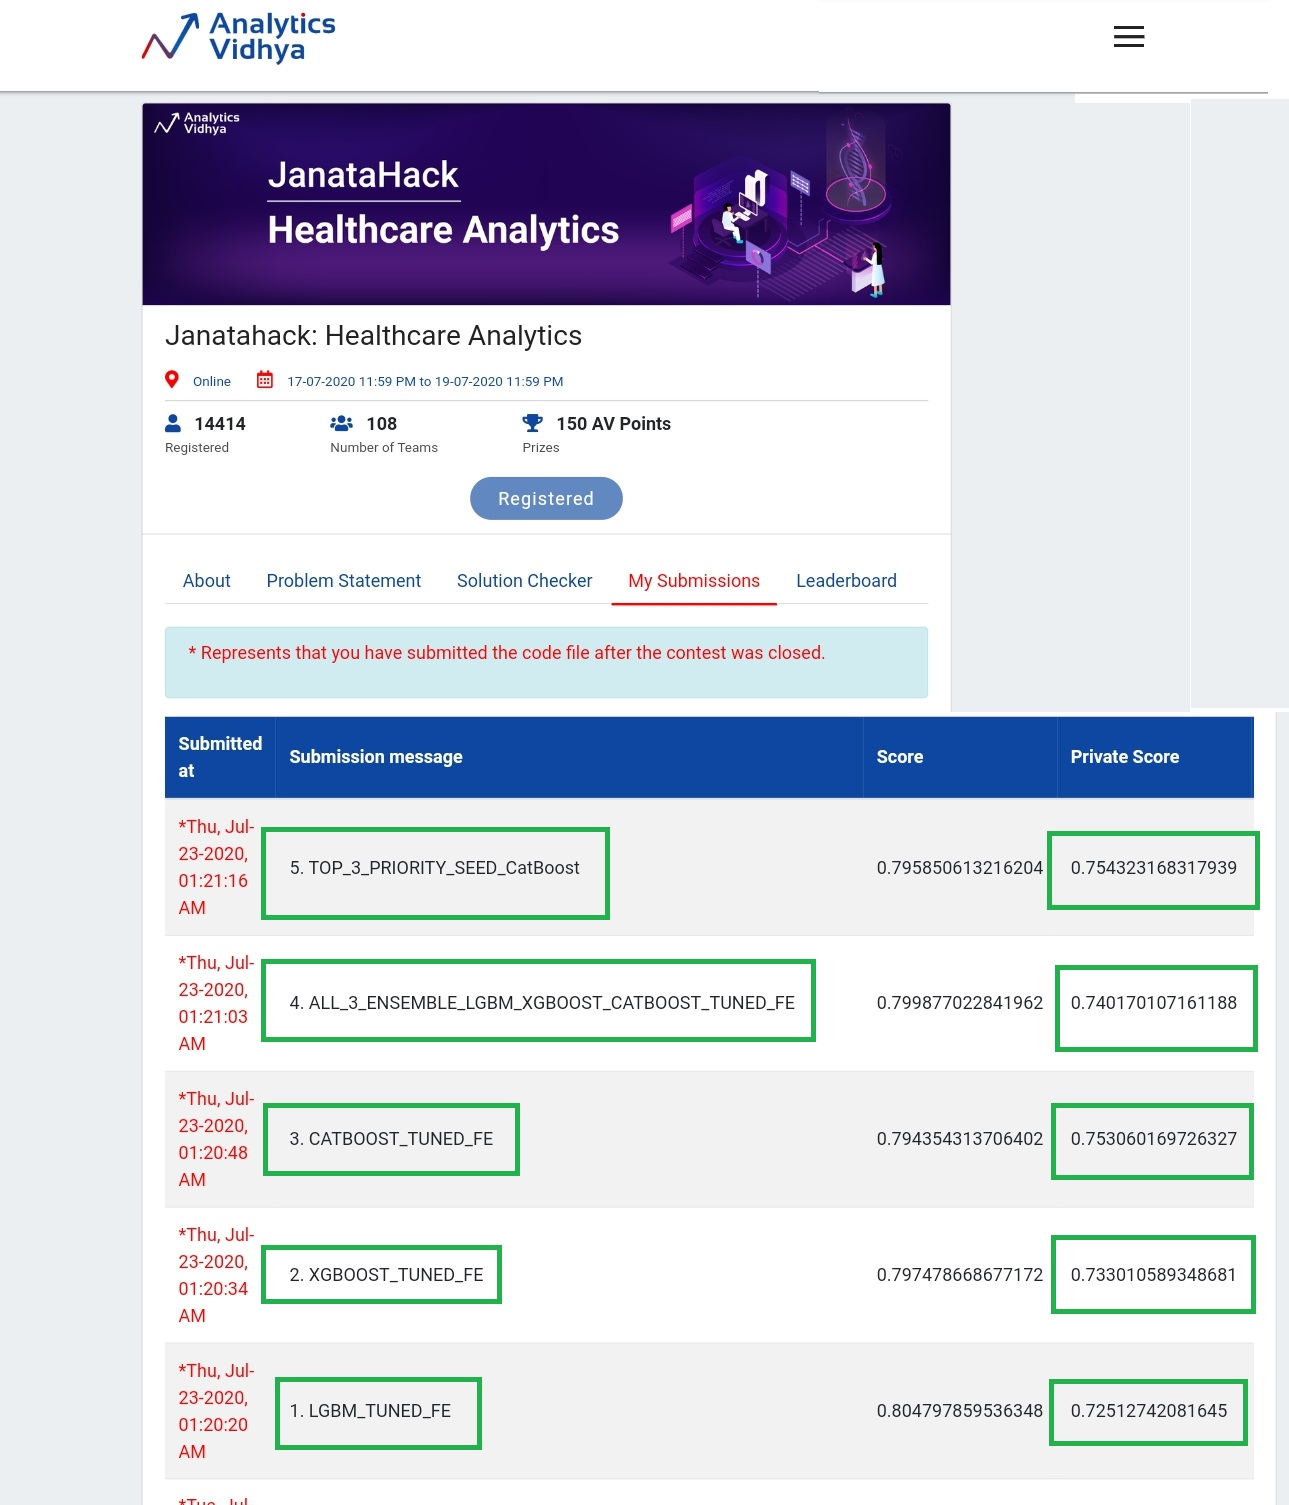

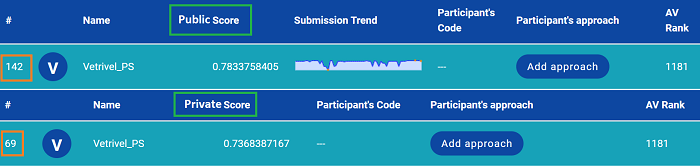

### **<center>😊 Happy to Build a Generalised and Robust Model to Finish in 69th Position in Private Leaderboard Moving UP by 73 Positions from 142nd Position in Public Leaderboard in the 2 Days Weekend Hackathon held on 17,18th July 2020. If this was my actual code, would have reached 54th Position in Private Leaderboard - leant a few things later after the Competition ended 😊</center>**

### **<center>😊 For Learning Purpose - You can still participate in your free time to see your Public and Private Scores & Private Rank, though it won't reflect on Leaderboard 😊</center>**

### **<center>😊 Ask your doubts & Share your thoughts, ideas & feedbacks in Comments below 😊</center>**

### **<center>😊 Thanks Friends - Stay Tuned for Part 2 for more Analysis and Modelling - UPVOTE & ENCOURAGE if you liked this Notebook 😊</center>**